In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
kiosk_locations_df = pd.read_csv('/Users/kabbo/Downloads/LinkNYC_Kiosk_Locations_20251008.csv')
kiosk_locations_df.describe()

,Council District,Community Board,Postcode,Latitude,Longitude,Building Identification Number (BIN),Borough-Block-Lot (BBL),Census Tract (CT)
count,2250.000000,2250.000000,2250.000000,2250.000000,2250.000000,2.177000e+03,2.236000e+03,2.089000e+03
mean,15.430667,209.325333,10488.262667,40.752010,-73.945543,2.064602e+06,2.070115e+09,1.871624e+06
std,13.696379,126.625972,572.806942,0.058336,0.059096,1.298100e+06,1.552374e+09,1.254539e+06
min,1.000000,101.000000,10001.000000,40.561755,-74.141731,3.073780e+05,1.000328e+09,2.130000e+02
25%,4.000000,106.000000,10021.000000,40.717811,-73.982230,1.036511e+06,1.011639e+09,1.010000e+06
50%,8.000000,111.000000,10036.000000,40.751185,-73.958516,1.081654e+06,1.020810e+09,1.019900e+06
75%,27.000000,308.000000,11208.000000,40.792656,-73.919172,3.083275e+06,3.027895e+09,3.022000e+06
max,50.000000,503.000000,11693.000000,40.882786,-73.705350,5.158060e+06,3.155501e+10,5.024700e+06


In [4]:
weekly_usage_df = pd.read_csv('/Users/kabbo/Downloads/LinkNYC_Weekly_Usage__Updated__20251008.csv')
weekly_usage_df.describe()

,Number of Sessions,Number of Unique Clients,TB Downloaded,TB Uploaded,Cumulative Bandwidth Utilization To Date (TB),Cumulative Sessions To Date,Cumulative Subscribers To Date
count,3.000000e+02,300.000000,300.000000,300.000000,300.000000,3.000000e+02,3.000000e+02
mean,5.495597e+06,292255.440000,111.617500,16.333533,31140.176200,3.157143e+09,1.315599e+07
std,3.491003e+06,93212.624683,36.044569,7.278802,11435.366213,3.984871e+08,6.069686e+06
min,1.651913e+06,90637.000000,45.600000,4.510000,14353.830000,2.251215e+09,8.461839e+06
25%,3.924049e+06,230114.000000,83.662500,7.572500,20748.517500,2.865478e+09,9.652915e+06
50%,4.786937e+06,273385.000000,112.905000,17.840000,28440.660000,3.130422e+09,1.233907e+07
75%,5.632313e+06,323924.250000,137.607500,21.325000,41776.377500,3.509879e+09,1.569804e+07
max,2.358416e+07,683250.000000,245.600000,38.410000,52081.130000,3.803278e+09,1.007006e+08


In [8]:
# ==============================================================================
# TAKEN FROM EDA CODE
# ==============================================================================


# --- Clean Weekly Usage Data ---
# Rename columns to a consistent, code-friendly format
weekly_usage_df.columns = [
    'week_end_date', 'sessions', 'avg_session_length', 'unique_clients',
    'tb_downloaded', 'tb_uploaded', 'cumulative_bandwidth_tb',
    'cumulative_sessions', 'cumulative_subscribers'
]
# Convert date column to datetime objects for time series analysis
weekly_usage_df['week_end_date'] = pd.to_datetime(weekly_usage_df['week_end_date'])
# Set the date as the index to make time-based plotting and resampling easier
weekly_usage_df = weekly_usage_df.set_index('week_end_date').sort_index()

# --- Clean Kiosk Locations Data ---
# Standardize column names
kiosk_locations_df.columns = kiosk_locations_df.columns.str.lower().str.replace(' ', '_').str.replace(r'[^a-zA-Z0-9_]', '', regex=True)
# Convert date columns, coercing errors to 'NaT' (Not a Time) for invalid dates
kiosk_locations_df['installation_complete'] = pd.to_datetime(kiosk_locations_df['installation_complete'], errors='coerce')
kiosk_locations_df['activation_complete'] = pd.to_datetime(kiosk_locations_df['activation_complete'], errors='coerce')


print("\n--- Weekly Usage DataFrame Info ---")
weekly_usage_df.info()
print("\n--- Kiosk Locations DataFrame Info ---")
kiosk_locations_df.info()


--- Weekly Usage DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 300 entries, 2020-01-05 to 2025-09-28
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sessions                 300 non-null    int64  
 1   avg_session_length       300 non-null    object 
 2   unique_clients           300 non-null    int64  
 3   tb_downloaded            300 non-null    float64
 4   tb_uploaded              300 non-null    float64
 5   cumulative_bandwidth_tb  300 non-null    float64
 6   cumulative_sessions      300 non-null    int64  
 7   cumulative_subscribers   300 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 21.1+ KB

--- Kiosk Locations DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2250 entries, 0 to 2249
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------       

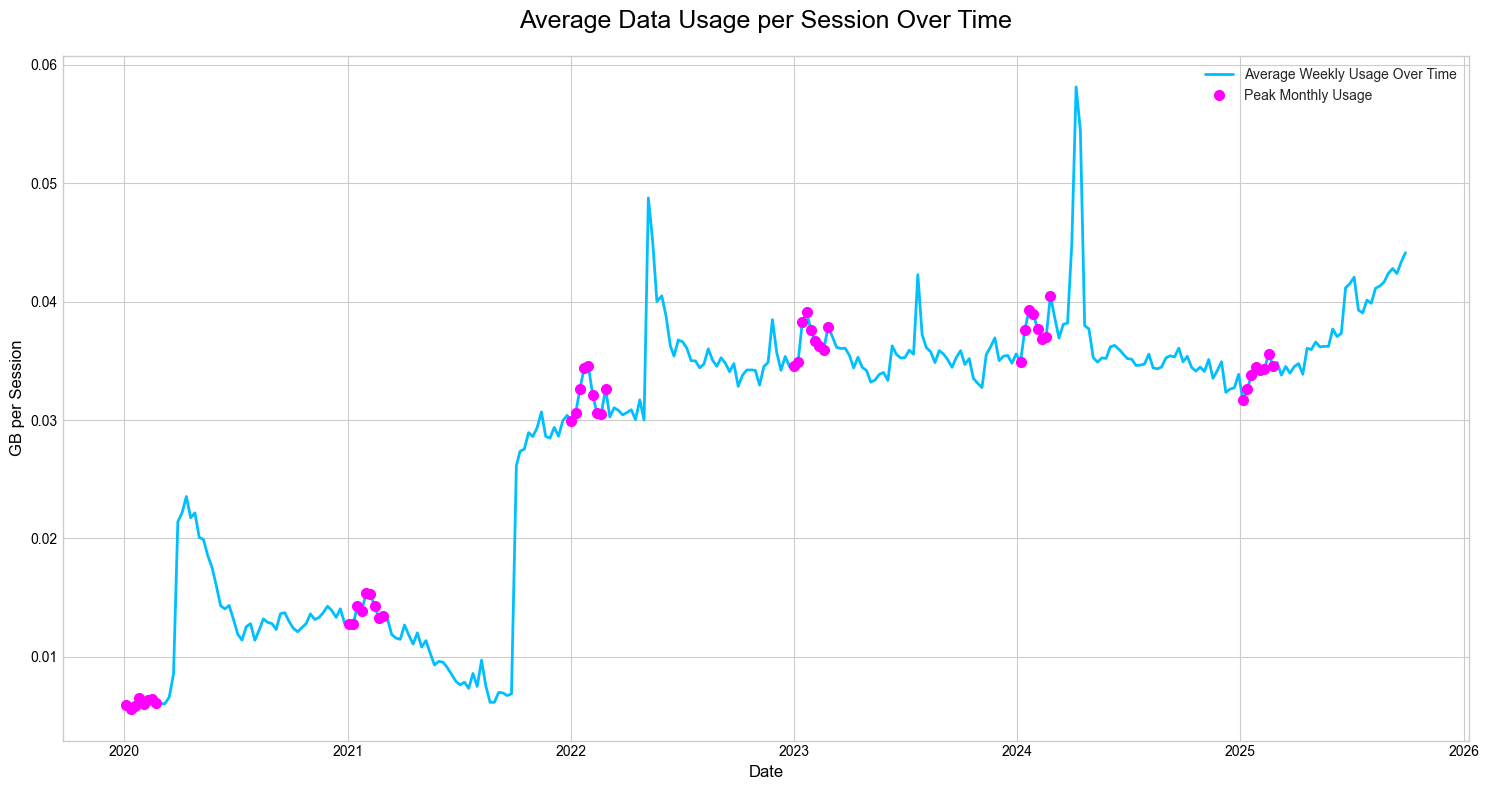

In [71]:
## IGNORE THIS BLOCK OF CODE 
## WE WERE EXPERIMENTING

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

try:
    # --- Part 1: Load and Re-create Features ---
    
    # Load the original, cleaned dataset from your EDA
    df = pd.read_csv(
        '/Users/kabbo/Downloads/LinkNYC_Weekly_Usage__Updated__20251008.csv',
        index_col=0,
        parse_dates=True
    )

    # Standardize column names
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

    # Define required columns
    required_columns = ['tb_downloaded', 'tb_uploaded', 'number_of_sessions']
    if all(col in df.columns for col in required_columns):

        # Re-create the core efficiency metric (GB per session)
        df['usage_efficiency_gb_per_session'] = (
            (df['tb_downloaded'] + df['tb_uploaded']) * 1024 / df['number_of_sessions']
        )

        # Re-create the seasonal peak flag
        df['is_seasonal_peak'] = df.index.month.isin([1, 2]).astype(int)

        # Re-create the interaction feature
        df['peak_week_efficiency_interaction'] = (
            df['is_seasonal_peak'] * df['usage_efficiency_gb_per_session']
        )
        
        # Replace 0s with np.nan for clean plotting
        df['peak_week_efficiency_interaction'] = df['peak_week_efficiency_interaction'].replace(0, np.nan)

        # --- Part 2: Visualize the Engineered Features ---
        plt.style.use('seaborn-v0_8-whitegrid')
        
        # --- EDIT: Create a single figure and axes object ---
        fig, ax = plt.subplots(figsize=(15, 8))
        
        # --- Plot both the overall trend and the peak season dots on the same axes ---
        ax.plot(df.index, df['usage_efficiency_gb_per_session'], color='deepskyblue', linewidth=2, label='Average Weekly Usage Over Time')
        ax.plot(df.index, df['peak_week_efficiency_interaction'], 'o', color='magenta', markersize=7, label='Peak Monthly Usage')
        
        # --- Add titles and labels ---
        ax.set_title('Average Data Usage per Session Over Time', color='black', fontsize=18, pad=20)
        ax.set_xlabel('Date', color='black', fontsize=12)
        ax.set_ylabel('GB per Session', color='black', fontsize=12)
        ax.legend()
        
        # --- Format ticks and grid ---
        ax.tick_params(axis='x', colors='black')
        ax.tick_params(axis='y', colors='black')
        ax.xaxis.set_major_locator(mdates.YearLocator())
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
        
        # --- Save the figure and show the plot ---
        plt.tight_layout()
        plt.show()

    else:
        print("Error: Could not find all required columns:", required_columns)
        print("Actual columns found:", df.columns.tolist())

except FileNotFoundError:
    print("Error: '/Users/kabbo/Downloads/LinkNYC_Weekly_Usage__Updated__20251008.csv' not found. Please check the file path.")
except Exception as e:
    print(f"An error occurred: {e}")



High engagement = session length > 21.07 mins



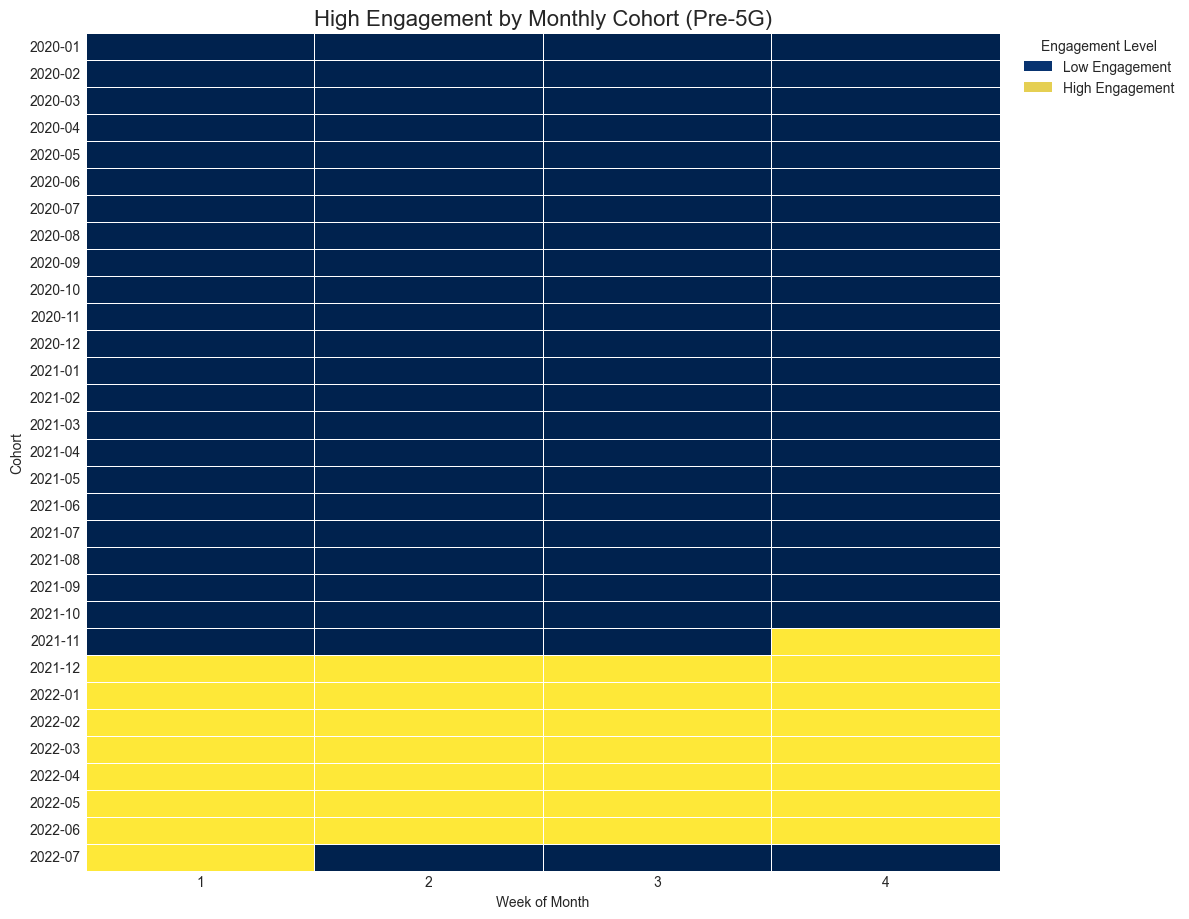

Week  Retention Rate (%)
  W1           25.806452
  W2           22.580645
  W3           22.580645
  W4           25.806452

Week 1: 25.8%, Week 4: 25.8%
Engagement remains stable (0.0pt change)

High engagement = session length > 32.72 mins



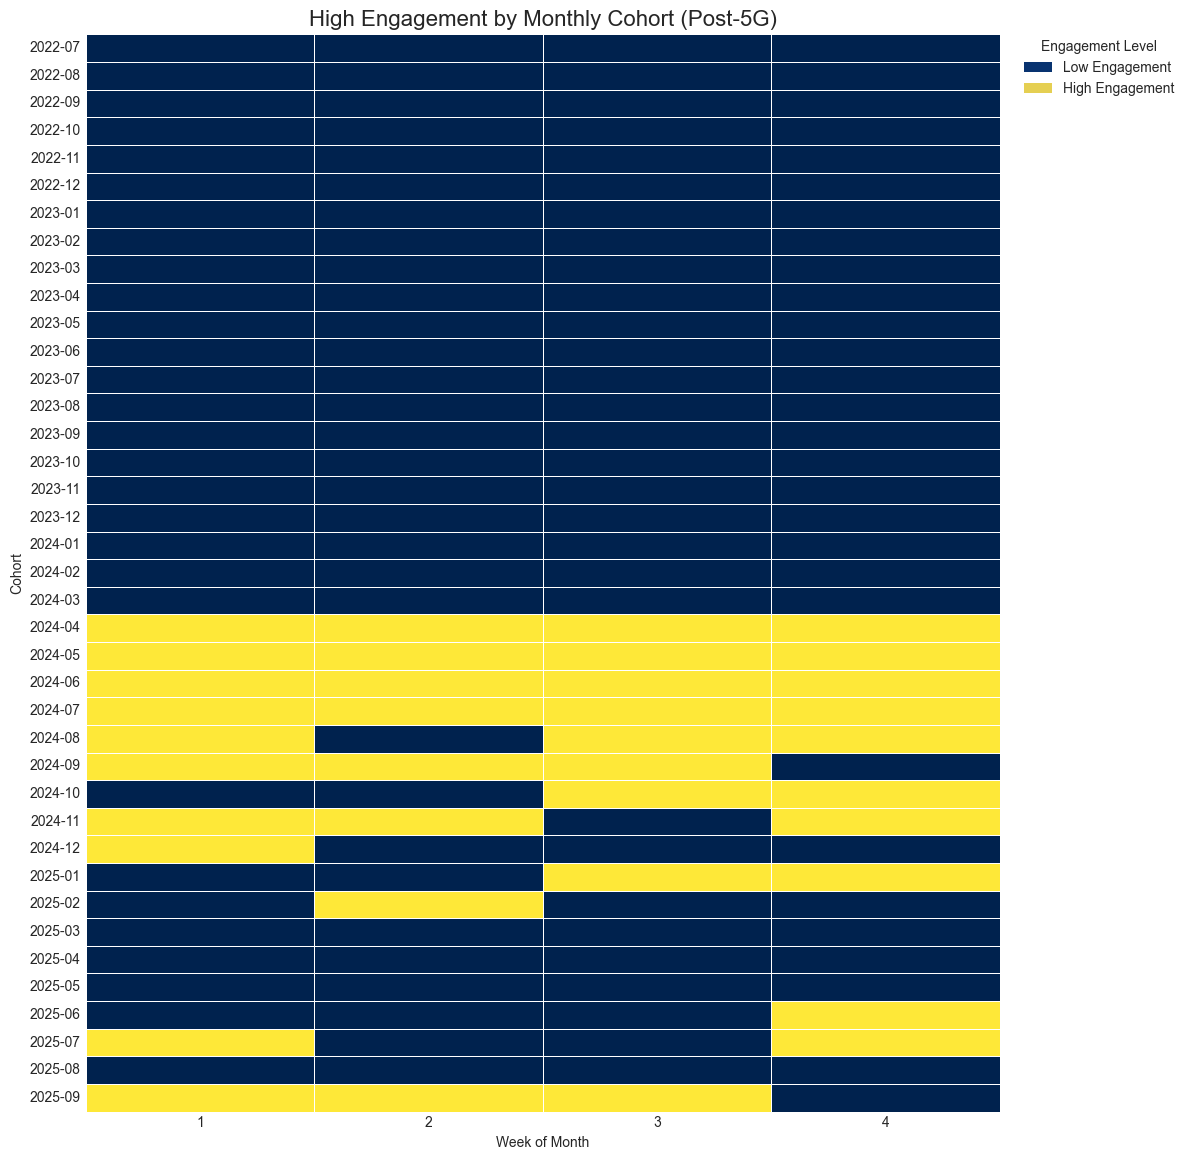

Week  Retention Rate (%)
  W1           25.641026
  W2           20.512821
  W3           23.076923
  W4           25.641026

Week 1: 25.6%, Week 4: 25.6%
Engagement remains stable (0.0pt change)



In [72]:
## COHORT ANALYSIS

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# --- Helper: Clean column names ---
def clean_columns(df):
    return df.rename(columns=lambda c: (
        c.strip().lower().replace(' ', '_').replace('(', '').replace(')', '')
    ))

# --- Helper: Run cohort analysis ---
def run_cohort_analysis(df, period):
    
    # Define engagement threshold
    threshold = df['average_session_length_minutes'].quantile(0.75)
    df['high_engagement_week'] = (df['average_session_length_minutes'] > threshold).astype(int)
    print(f"High engagement = session length > {threshold:.2f} mins\n")

    # Cohort setup
    df['cohort'] = df.index.to_period('M')
    df['week_of_month'] = df.groupby('cohort').cumcount() + 1
    cohort_data = df[df['week_of_month'].between(1, 4)]

    # Pivot & plot
    pivot = cohort_data.pivot_table(
        index='cohort',
        columns='week_of_month',
        values='high_engagement_week',
        fill_value=0
    )
    pivot.index = pivot.index.strftime('%Y-%m')
    
    plt.figure(figsize=(12, max(6, len(pivot)*0.3)))
    ax = sns.heatmap(
        pivot,
        annot=False,         # Remove numbers
        cmap='cividis',
        cbar=False,          # Disable continuous colorbar
        linewidths=.5
    )

    # --- Add custom legend ---
    # cividis goes from dark blue (low) → yellow (high)
    legend_elements = [
        Patch(facecolor=sns.color_palette('cividis', as_cmap=True)(0.1), label='Low Engagement'),
        Patch(facecolor=sns.color_palette('cividis', as_cmap=True)(0.9), label='High Engagement')
    ]
    plt.legend(
        handles=legend_elements,
        title='Engagement Level',
        bbox_to_anchor=(1.02, 1),
        loc='upper left',
        borderaxespad=0,
        frameon=False
    )

    plt.title(f'High Engagement by Monthly Cohort ({period})', fontsize=16)
    plt.xlabel('Week of Month')
    plt.ylabel('Cohort')
    plt.tight_layout()
    plt.show()

    # Retention summary
    avg_retention = pivot.mean() * 100
    summary = pd.DataFrame({
        'Week': [f'W{i+1}' for i in range(len(avg_retention))],
        'Retention Rate (%)': avg_retention.values
    })
    print(summary.to_string(index=False))

    # Interpretation
    if not avg_retention.empty:
        drop = avg_retention.iloc[0] - avg_retention.iloc[-1]
        print(f"\nWeek 1: {avg_retention.iloc[0]:.1f}%, Week 4: {avg_retention.iloc[-1]:.1f}%")
        msg = ("Engagement fades slightly" if abs(drop) > 5 
               else "Engagement remains stable")
        print(f"{msg} ({drop:.1f}pt change)\n")

# --- Main ---

path = '/Users/kabbo/Downloads/LinkNYC_Weekly_Usage__Updated__20251008.csv'
df = pd.read_csv(path, index_col=0, parse_dates=True)
df = clean_columns(df)

if df.index.has_duplicates:
    n_dupes = df.index.duplicated().sum()
    df = df[~df.index.duplicated(keep='last')]
    print(f"Removed {n_dupes} duplicate date(s).")

# Core metric
df['average_session_length_minutes'] = (
    pd.to_timedelta(df['average_session_length']).dt.total_seconds() / 60
)

# Split by 5G rollout
cutoff = '2022-07-10'
run_cohort_analysis(df[df.index < cutoff].copy(), "Pre-5G")
run_cohort_analysis(df[df.index >= cutoff].copy(), "Post-5G")



--- Energy Efficiency Segment Summary ---
                   avg_efficiency_score  number_of_weeks
energy_usage_flag                                       
Poor                             0.0136               90
Fair                             0.0379               90
Good                             0.0419               90
Excellent                        0.0493               30


/var/folders/78/8f22v_ln4kvg9b_7fr3_2nfh0000gn/T/ipykernel_75703/2589116031.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['energy_usage_flag'], order=order, palette='viridis')


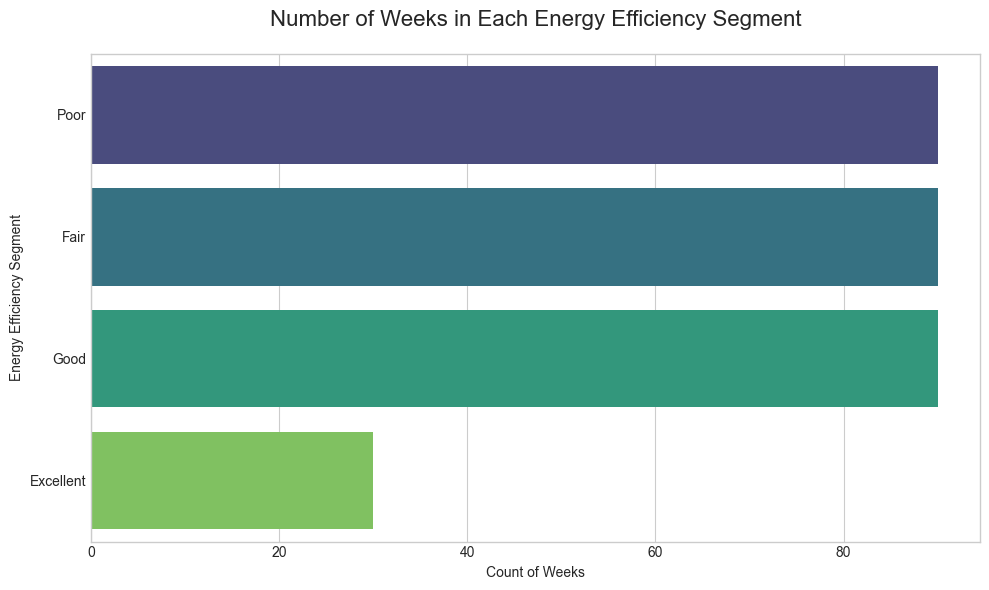


ROI Strategy:
- Excellent → Replicate these conditions (e.g., events, traffic patterns).
- Good → Optimize to push performance into 'Excellent'.
- Fair/Poor → Investigate causes (low-value sessions, network issues, etc.).



In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

'''
# --- Helper Functions ---
def clean_columns(df):
    return df.rename(columns=lambda c: c.strip().lower().replace(' ', '_').replace('(', '').replace(')', ''))
'''

def load_data(path):
    df = pd.read_csv(path, index_col=0, parse_dates=True)
    df = clean_columns(df)
    if df.index.has_duplicates:
        df = df[~df.index.duplicated(keep='last')]
    return df

def compute_energy_efficiency(df):
    data_gb = (df['tb_uploaded'] + df['tb_downloaded']) * 1024
    energy_proxy = (df['number_of_sessions'] * 0.85) + (df['number_of_unique_clients'] * 0.15)
    df['energy_efficiency'] = data_gb / energy_proxy
    return df

def label_efficiency(df):
    q30, q60, q90 = df['energy_efficiency'].quantile([0.3, 0.6, 0.9])
    def flag(x):
        return (
            'Poor' if x < q30 else
            'Fair' if x < q60 else
            'Good' if x < q90 else
            'Excellent'
        )
    df['energy_usage_flag'] = df['energy_efficiency'].apply(flag)
    return df

def summarize_and_plot(df):
    order = ['Poor', 'Fair', 'Good', 'Excellent']
    summary = (
        df.groupby('energy_usage_flag')['energy_efficiency']
        .agg(avg_efficiency_score='mean', number_of_weeks='count')
        .reindex(order)
        .round(4)
    )
    print("\n--- Energy Efficiency Segment Summary ---")
    print(summary)

    plt.style.use('seaborn-v0_8-whitegrid')
    plt.figure(figsize=(10, 6))
    sns.countplot(y=df['energy_usage_flag'], order=order, palette='viridis')
    plt.title('Number of Weeks in Each Energy Efficiency Segment', fontsize=16, pad=20)
    plt.xlabel('Count of Weeks')
    plt.ylabel('Energy Efficiency Segment')
    plt.tight_layout()    
    plt.show()


    print("""
ROI Strategy:
- Excellent → Replicate these conditions (e.g., events, traffic patterns).
- Good → Optimize to push performance into 'Excellent'.
- Fair/Poor → Investigate causes (low-value sessions, network issues, etc.).
""")

# --- Main ---
try:
    path = '/Users/kabbo/Downloads/LinkNYC_Weekly_Usage__Updated__20251008.csv'
    df = load_data(path)

    df = compute_energy_efficiency(df)

    df = label_efficiency(df)

    summarize_and_plot(df)

except FileNotFoundError:
    print("Error: CSV file not found. Please check the file path.")
except Exception as e:
    print(f"Error: {e}")
